--- Attempting to load THE VERY FIRST EXAMPLE from: openbmb/RLAIF-V-Dataset using streaming ---

Successfully fetched the first example via streaming:
{'ds_name': 'RLAIF-V', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x78F9CECB0190>, 'question': 'Who is more likely to use these tools a leather crafter or a paper crafter?', 'chosen': 'A leather crafter is more likely to use these tools. The image shows various crafting tools, including scissors and a hole punch, which are commonly used in leatherworking projects. Leather is a material that requires cutting, shaping, and precise hole-punching techniques to create desired designs or patterns. In contrast, paper crafters typically use different types of tools, such as adhesives, decorative papers, or specialized cutting machines like the Silhouette Cameo, for their projects.', 'rejected': 'A leather crafter is more likely to use these tools as they consist of a hole punch, scissors, and a knife. These items 

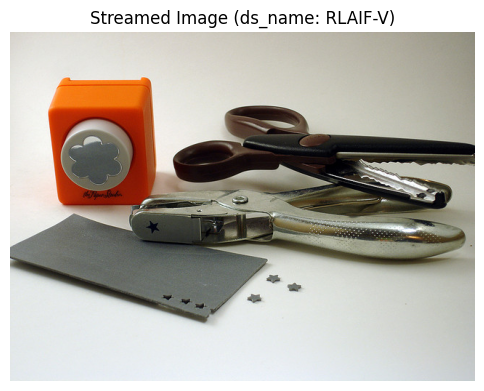


Relevant text fields from the first streamed example:
  Dataset Source (ds_name): RLAIF-V
  Prompt (question): Who is more likely to use these tools a leather crafter or a paper crafter?
  Chosen: A leather crafter is more likely to use these tools. The image shows various crafting tools, including scissors and a hole punch, which are commonly used in leatherworking projects. Leather is a material that requires cutting, shaping, and precise hole-punching techniques to create desired designs or patterns. In contrast, paper crafters typically use different types of tools, such as adhesives, decorative papers, or specialized cutting machines like the Silhouette Cameo, for their projects.
  Rejected: A leather crafter is more likely to use these tools as they consist of a hole punch, scissors, and a knife. These items are typically used in crafting projects involving fabric or leather materials for various designs and patterns. Paper crafters may also benefit from some of these tools, but

In [1]:
from datasets import load_dataset
from PIL import Image # Ensure Image is imported
import matplotlib.pyplot as plt
# requests and io might not be needed if image loads directly and correctly

dataset_id = "openbmb/RLAIF-V-Dataset"

print(f"--- Attempting to load THE VERY FIRST EXAMPLE from: {dataset_id} using streaming ---")

first_example_data = None
pil_image_from_stream = None

try:
    # Load the dataset in streaming mode
    # We'll iterate to get just the first item
    streamed_dataset = load_dataset(dataset_id, split="train", streaming=True)
    
    # Get the first example from the iterator
    for example in streamed_dataset:
        first_example_data = example
        break # Stop after the first one
        
    if first_example_data:
        print("\nSuccessfully fetched the first example via streaming:")
        print(first_example_data)
        
        # Extract the image (should be a PIL Image object directly)
        pil_image_from_stream = first_example_data.get('image')
        
        if pil_image_from_stream:
            try:
                print(f"\nImage directly from streamed dataset (type: {type(pil_image_from_stream)}):")
                if hasattr(pil_image_from_stream, 'size'):
                    print(f"  Image size: {pil_image_from_stream.size}")
                if hasattr(pil_image_from_stream, 'mode'):
                    print(f"  Image mode: {pil_image_from_stream.mode}")

                plt.figure(figsize=(6,6))
                plt.imshow(pil_image_from_stream)
                plt.title(f"Streamed Image (ds_name: {first_example_data.get('ds_name', 'N/A')})")
                plt.axis('off')
                plt.show()

                print("\nRelevant text fields from the first streamed example:")
                print(f"  Dataset Source (ds_name): {first_example_data.get('ds_name')}")
                print(f"  Prompt (question): {first_example_data.get('question')}")
                print(f"  Chosen: {first_example_data.get('chosen')}")
                print(f"  Rejected: {first_example_data.get('rejected')}")
                print(f"  Origin Dataset: {first_example_data.get('origin_dataset')}")

            except Exception as e_img:
                print(f"Could not display image from streamed example: {e_img}")
        else:
            print("PIL Image not found in the 'image' field of the first streamed example.")
            
    else:
        print("Could not fetch the first example even with streaming.")

except Exception as e:
    print(f"\nError loading or streaming dataset: {e}")
    print("If this is an authentication issue, try 'huggingface-cli login'.")
    print("Other issues could be network connectivity or temporary Hugging Face Hub problems.")

--- Attempting to load THE FIRST 10 EXAMPLES from: openbmb/RLAIF-V-Dataset using streaming ---

Successfully fetched 10 examples via streaming.
Dataset({
    features: ['ds_name', 'image', 'question', 'chosen', 'rejected', 'origin_dataset', 'origin_split', 'idx', 'image_path'],
    num_rows: 10
})

--- Visualizing first 3 samples ---

--- Sample 1 ---
Image (type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (640, 480), mode: RGB)


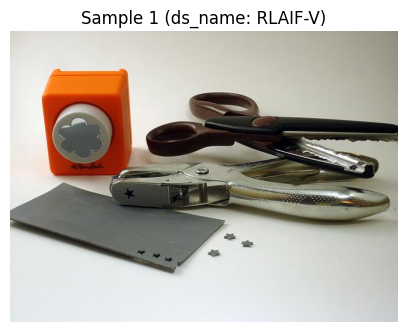

  Dataset Source (ds_name): RLAIF-V
  Prompt (question): Who is more likely to use these tools a leather crafter or a paper crafter?

  Chosen Response (length 496):
    A leather crafter is more likely to use these tools. The image shows various crafting tools, including scissors and a hole punch, which are commonly used in leatherworking projects. Leather is a material that requires cutting, shaping, and precise hole-punching techniques to create desired designs or patterns. In contrast, paper crafters typically use different types of tools, such as adhesives, decorative papers, or specialized cutting machines like the Silhouette Cameo, for their projects.

  Rejected Response (length 442):
    A leather crafter is more likely to use these tools as they consist of a hole punch, scissors, and a knife. These items are typically used in crafting projects involving fabric or leather materials for various designs and patterns. Paper crafters may also benefit from some of these tools, but 

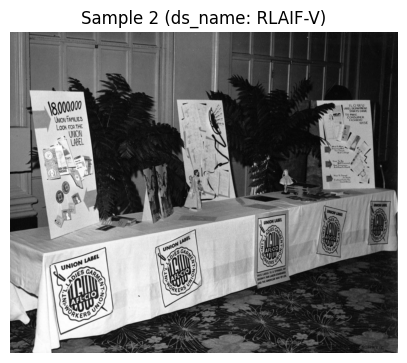

  Dataset Source (ds_name): RLAIF-V
  Prompt (question): how many families?

  Chosen Response (length 70):
    The image shows a Union Organization table setup with 18,000 families.

  Rejected Response (length 58):
    The image does not provide any information about families.
  Origin Dataset: TextVQA
--------------------------------------------------

--- Sample 3 ---
Image (type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (640, 339), mode: RGB)


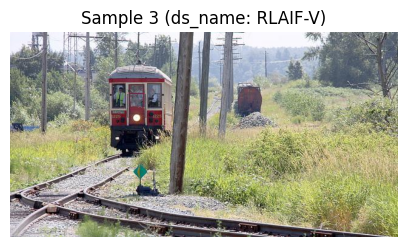

  Dataset Source (ds_name): RLAIF-V
  Prompt (question): What is the setting or environment in which the image takes place?

  Chosen Response (length 135):
    The image depicts a train traveling on a track through a countryside setting with tall grass, trees, and power lines in the background.

  Rejected Response (length 95):
    The image is set in an open area with train tracks, grassy fields, and trees in the background.
  Origin Dataset: COCO
--------------------------------------------------

--- Checking for missing key values in loaded samples ---
No missing key values found in the loaded samples.

Unique 'ds_name' values in the loaded 10 samples: {'RLAIF-V'}

--- Caption and Question Length Statistics (for loaded samples) ---
Chosen Captions - Min: 70, Max: 516, Avg: 296.10
Rejected Captions - Min: 58, Max: 656, Avg: 310.10
Questions - Min: 18, Max: 105, Avg: 54.00


In [2]:
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np # For basic stats on lengths if desired

dataset_id = "openbmb/RLAIF-V-Dataset"
num_samples_to_load = 10 # Load 10 samples for this exploration

print(f"--- Attempting to load THE FIRST {num_samples_to_load} EXAMPLES from: {dataset_id} using streaming ---")

# List to hold the loaded samples
loaded_samples_list = []

try:
    streamed_dataset = load_dataset(dataset_id, split="train", streaming=True)
    
    count = 0
    for example in streamed_dataset:
        loaded_samples_list.append(example)
        count += 1
        if count >= num_samples_to_load:
            break
            
    if loaded_samples_list:
        print(f"\nSuccessfully fetched {len(loaded_samples_list)} examples via streaming.")
        
        # Convert list of dicts to a datasets.Dataset like object for easier column access (optional but convenient)
        # This requires creating a Dataset from the Python list; for small N this is fine.
        from datasets import Dataset as HFDataset
        rlaif_v_dataset_sample = HFDataset.from_list(loaded_samples_list)
        print(rlaif_v_dataset_sample) # Show the structure of the converted Dataset object

        # --- Visualize a few samples ---
        num_to_visualize = min(3, len(rlaif_v_dataset_sample))
        print(f"\n--- Visualizing first {num_to_visualize} samples ---")

        for i in range(num_to_visualize):
            example = rlaif_v_dataset_sample[i] # Now we can index
            print(f"\n--- Sample {i+1} ---")

            pil_image = example.get('image')
            
            if pil_image:
                try:
                    # Ensure image is RGB for displaying with matplotlib
                    if pil_image.mode != 'RGB':
                        pil_image = pil_image.convert('RGB')
                        
                    print(f"Image (type: {type(pil_image)}, size: {pil_image.size}, mode: {pil_image.mode})")
                    plt.figure(figsize=(5,5))
                    plt.imshow(pil_image)
                    plt.title(f"Sample {i+1} (ds_name: {example.get('ds_name', 'N/A')})")
                    plt.axis('off')
                    plt.show()

                    print(f"  Dataset Source (ds_name): {example.get('ds_name')}")
                    print(f"  Prompt (question): {example.get('question')}")
                    print(f"\n  Chosen Response (length {len(example.get('chosen',''))}):\n    {example.get('chosen')}")
                    print(f"\n  Rejected Response (length {len(example.get('rejected',''))}):\n    {example.get('rejected')}")
                    print(f"  Origin Dataset: {example.get('origin_dataset')}")
                    print("-" * 50)

                except Exception as e_img:
                    print(f"Could not display image for sample {i+1}: {e_img}")
            else:
                print(f"PIL Image not found in sample {i+1}.")
        
        # --- Check for missing values in key fields for the loaded samples ---
        print("\n--- Checking for missing key values in loaded samples ---")
        missing_count = 0
        for i, example in enumerate(rlaif_v_dataset_sample):
            if not all([
                example.get('image') is not None, 
                example.get('question') is not None, 
                example.get('chosen') is not None, 
                example.get('rejected') is not None,
                example.get('ds_name') is not None
            ]):
                print(f"Warning: Missing key data in sample {i}:")
                for key_check in ['image', 'question', 'chosen', 'rejected', 'ds_name']:
                    if example.get(key_check) is None:
                        print(f"  Missing: {key_check}")
                missing_count +=1
        if missing_count == 0:
            print("No missing key values found in the loaded samples.")

        # --- Get unique 'ds_name' values ---
        try:
            unique_ds_names = set(rlaif_v_dataset_sample['ds_name'])
            print(f"\nUnique 'ds_name' values in the loaded {len(rlaif_v_dataset_sample)} samples: {unique_ds_names}")
        except Exception as e:
            print(f"Could not get unique ds_names: {e}")

        # --- Get basic stats on caption lengths ---
        try:
            chosen_lengths = [len(text) if text else 0 for text in rlaif_v_dataset_sample['chosen']]
            rejected_lengths = [len(text) if text else 0 for text in rlaif_v_dataset_sample['rejected']]
            question_lengths = [len(text) if text else 0 for text in rlaif_v_dataset_sample['question']]

            print("\n--- Caption and Question Length Statistics (for loaded samples) ---")
            print(f"Chosen Captions - Min: {np.min(chosen_lengths)}, Max: {np.max(chosen_lengths)}, Avg: {np.mean(chosen_lengths):.2f}")
            print(f"Rejected Captions - Min: {np.min(rejected_lengths)}, Max: {np.max(rejected_lengths)}, Avg: {np.mean(rejected_lengths):.2f}")
            print(f"Questions - Min: {np.min(question_lengths)}, Max: {np.max(question_lengths)}, Avg: {np.mean(question_lengths):.2f}")
        except Exception as e:
            print(f"Could not compute length statistics: {e}")
            
    else:
        print("Could not fetch any examples even with streaming.")

except Exception as e:
    print(f"\nError loading or streaming dataset: {e}")